# 📊 Data Science Job Market Analysis

Este proyecto analiza el mercado laboral en Data Science, con foco en salarios,
experiencia, tipo de empleo y modalidad de trabajo.


## 1. Carga del dataset


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

df = pd.read_csv("../data/raw/ds_salaries.csv")
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 2. Vista general del dataset


In [50]:
df.shape


(607, 12)

In [51]:
df.isnull().sum()


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## 📂 Overview del dataset

El dataset contiene información sobre salarios en roles de Data Science,
incluyendo nivel de experiencia, tipo de empleo, modalidad de trabajo y salario anual en USD.




## 3. Roles más frecuentes

Antes de analizar salarios, observamos cuáles son los roles más comunes en el dataset.



In [53]:
df['job_title'].value_counts().head(10)


job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Director of Data Science        7
Name: count, dtype: int64

**Insight:**  
Los roles más frecuentes están asociados a posiciones generales de Data Science,
lo que indica una alta demanda de perfiles versátiles en el mercado.


## 4. Distribución general de salarios

Este gráfico muestra cómo se distribuyen los salarios anuales en USD.


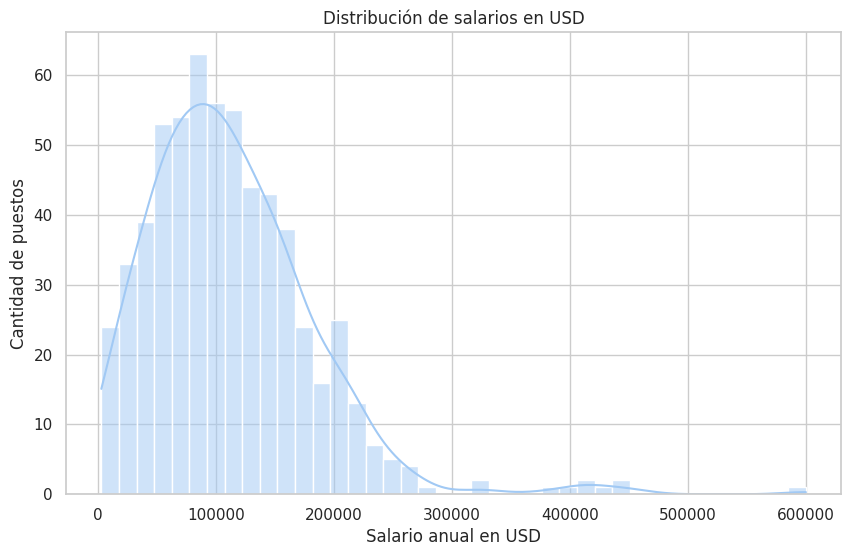

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], bins=40, kde=True)
plt.title("Distribución de salarios en USD")
plt.xlabel("Salario anual en USD")
plt.ylabel("Cantidad de puestos")
plt.show()


**Insight:**  
La distribución presenta una concentración en rangos salariales medios
y una cola hacia valores altos, lo que sugiere la existencia de roles senior
con salarios significativamente superiores.


## 5. Salario según nivel de experiencia

Analizamos cómo varía el salario en función del nivel de experiencia.


/tmp/ipykernel_15332/549499597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


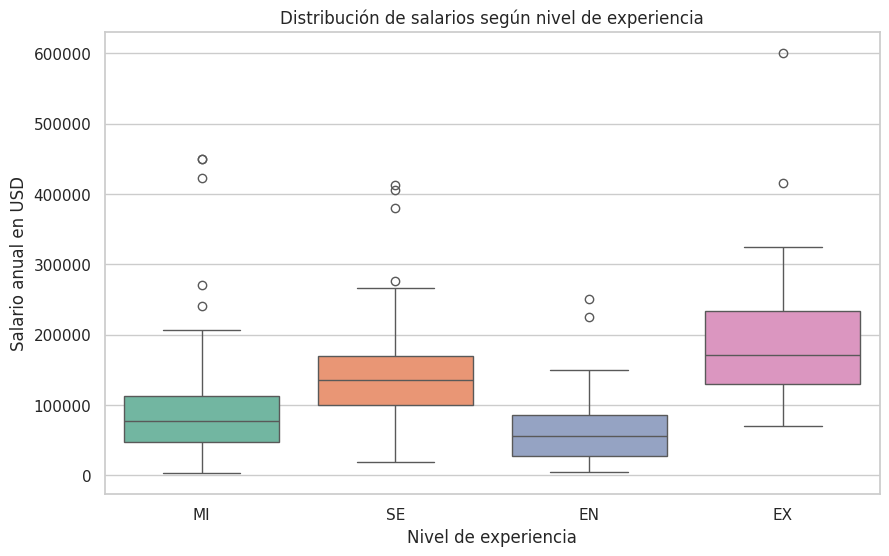

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df,
    palette="Set2",
    legend=False
)
plt.title('Distribución de salarios según nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario anual en USD')
plt.show()


**Insight:**  
Existe un aumento progresivo de la mediana salarial a medida que crece la experiencia.
Los niveles Senior y Executive presentan mayor dispersión y presencia de outliers.


## 6. Salario según tipo de empleo

Se analiza el salario promedio según el tipo de contrato.


/tmp/ipykernel_15332/324291261.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


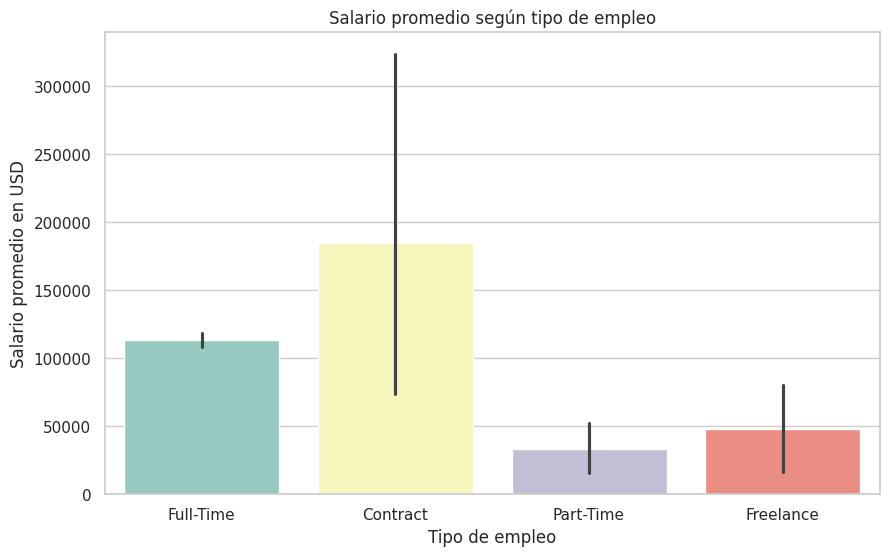

In [56]:
emp_map = {'FT':'Full-Time', 'PT':'Part-Time', 'CT':'Contract', 'FL':'Freelance'}
df['employment_type_label'] = df['employment_type'].map(emp_map)

plt.figure(figsize=(10,6))
sns.barplot(
    x='employment_type_label',
    y='salary_in_usd',
    data=df,
    palette="Set3"
)
plt.title("Salario promedio según tipo de empleo")
plt.xlabel("Tipo de empleo")
plt.ylabel("Salario promedio en USD")
plt.show()


**Insight:**  
Los empleos Full-Time presentan el salario promedio más alto,
mientras que Part-Time y Freelance muestran valores más bajos.


## 7. Salario según modalidad de trabajo

Evaluamos el impacto del trabajo remoto en el salario.


/tmp/ipykernel_15332/2442256953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


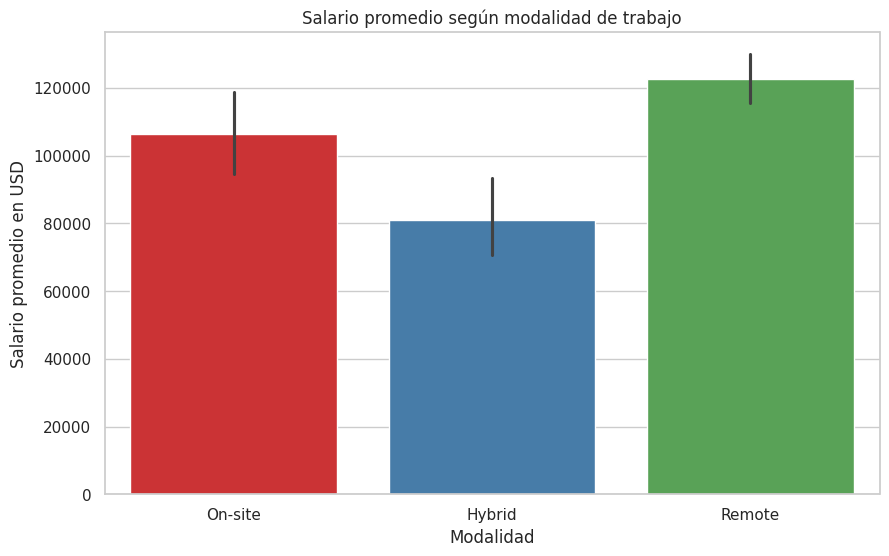

In [57]:
remote_map = {0:'On-site', 50:'Hybrid', 100:'Remote'}
df['remote_label'] = df['remote_ratio'].map(remote_map)

plt.figure(figsize=(10,6))
sns.barplot(
    x='remote_label',
    y='salary_in_usd',
    data=df,
    palette="Set1"
)
plt.title("Salario promedio según modalidad de trabajo")
plt.xlabel("Modalidad")
plt.ylabel("Salario promedio en USD")
plt.show()


**Insight:**  
Las posiciones remotas ofrecen salarios comparables o superiores
a las presenciales, reflejando la madurez del trabajo remoto en Data Science.


## 8. Top 10 roles mejor pagos


/tmp/ipykernel_15332/951331486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette="coolwarm")


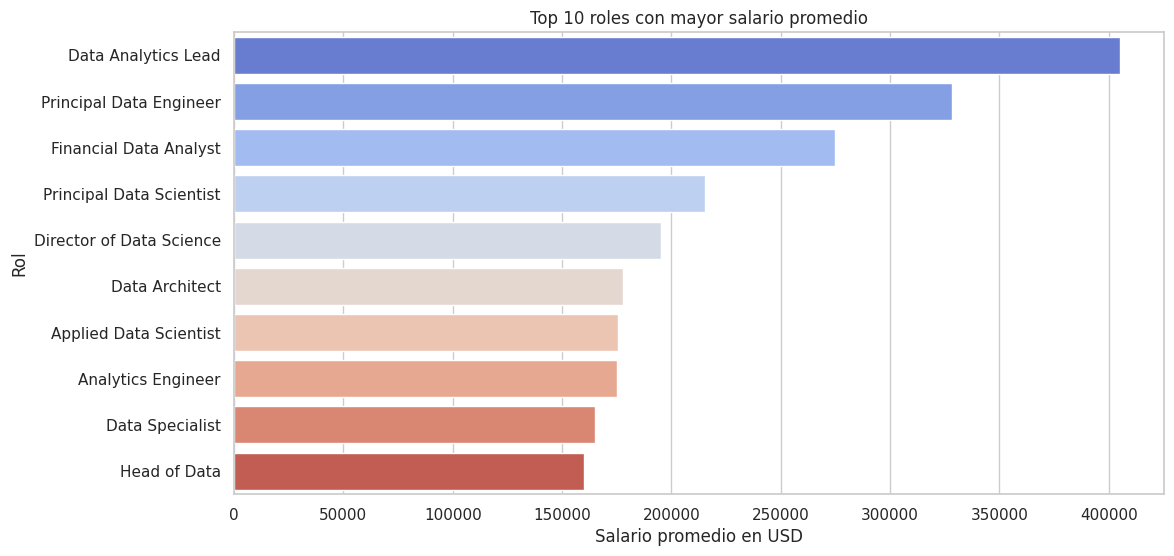

In [58]:
top_roles = (
    df.groupby('job_title')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x=top_roles.values, y=top_roles.index, palette="coolwarm")
plt.title("Top 10 roles con mayor salario promedio")
plt.xlabel("Salario promedio en USD")
plt.ylabel("Rol")
plt.show()


**Insight:**  
Los salarios más altos se concentran en roles especializados,
como Data Scientist Senior, ML Engineer y Data Engineer.


## 9. Conclusiones

- El salario aumenta claramente con la experiencia.
- El trabajo remoto se consolida como una modalidad competitiva.
- Los roles especializados lideran los niveles salariales.
- Existe alta dispersión salarial en posiciones senior.
